<a href="https://colab.research.google.com/github/krimits/Applied-Machine-Learning-2025/blob/claude%2Findex-codebase-011CUTjXyq79TNsPpLWTDJEu/%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_economic_connectedness_step1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Economic Connectedness Assignment - Step 1
## Data Acquisition & Exploration

**Όνομα Φοιτητή:** [Το όνομά σου]

**ΑΜ:** [Ο αριθμός μητρώου σου]

---

Σε αυτό το notebook θα:
1. Εγκαταστήσουμε τις απαραίτητες βιβλιοθήκες
2. Κατεβάσουμε τα δεδομένα
3. Κάνουμε initial exploration των datasets
4. Καταλάβουμε τη δομή τους

## 1. Εγκατάσταση Βιβλιοθηκών

In [ ]:
# Εγκατάσταση απαραίτητων βιβλιοθηκών για Colab
!pip install -q plotly geopandas folium kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 2.1 MB/s eta 0:00:00


In [ ]:
# Import βασικών βιβλιοθηκών
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Ρυθμίσεις για καλύτερα plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Όλες οι βιβλιοθήκες φορτώθηκαν επιτυχώς!")

✅ Όλες οι βιβλιοθήκες φορτώθηκαν επιτυχώς!


## 2. Δημιουργία Δομής Φακέλων στο Colab

In [ ]:
# Δημιουργία φακέλων
import os

folders = ['data', 'data/raw', 'data/processed', 'figures']
for folder in folders:
    os.makedirs(folder, exist_ok=True)
    print(f"📁 Δημιουργήθηκε: {folder}")

print("\n✅ Η δομή φακέλων είναι έτοιμη!")

📁 Δημιουργήθηκε: data
📁 Δημιουργήθηκε: data/raw
📁 Δημιουργήθηκε: data/processed
📁 Δημιουργήθηκε: figures

✅ Η δομή φακέλων είναι έτοιμη!


## 3. Download Δεδομένων

### 3.1 Social Capital Atlas Data

**ΣΗΜΑΝΤΙΚΟ:** Για να κατεβάσεις τα δεδομένα:

1. Πήγαινε στο: https://data.humdata.org/dataset/social-capital-atlas
2. Κατέβασε τα παρακάτω αρχεία:
   - `social_capital_county.csv`
   - `social_capital_zip.csv`
   - `social_capital_high_school.csv`
   - `social_capital_college.csv`

3. **Upload στο Colab:**
   - Τρέξε το cell παρακάτω
   - Ή ανέβασε τα αρχεία στο Google Drive και mount το Drive

In [ ]:
# ΕΠΙΛΟΓΗ 1: Manual Upload (για μικρά αρχεία)
from google.colab import files

print("📤 Ανέβασε τα Social Capital Atlas CSV files:")
print("   - social_capital_county.csv")
print("   - social_capital_zip.csv")
print("   - social_capital_high_school.csv")
print("   - social_capital_college.csv")
print("\nΠάτα 'Choose Files' και διάλεξε τα αρχεία...\n")

uploaded = files.upload()

# Μετακίνηση των αρχείων στον φάκελο data/raw
for filename in uploaded.keys():
    !mv "{filename}" data/raw/
    print(f"✅ {filename} -> data/raw/")

📤 Ανέβασε τα Social Capital Atlas CSV files:
   - social_capital_county.csv
   - social_capital_zip.csv
   - social_capital_high_school.csv
   - social_capital_college.csv

Πάτα 'Choose Files' και διάλεξε τα αρχεία...



Saving social_capital_college.csv to social_capital_college.csv
Saving social_capital_county.csv to social_capital_county.csv
Saving social_capital_high_school.csv to social_capital_high_school.csv
Saving social_capital_zip.csv to social_capital_zip.csv
✅ social_capital_college.csv -> data/raw/
✅ social_capital_county.csv -> data/raw/
✅ social_capital_high_school.csv -> data/raw/
✅ social_capital_zip.csv -> data/raw/


In [ ]:
# ΕΠΙΛΟΓΗ 2: Χρήση Google Drive (προτεινόμενο για μεγάλα αρχεία)
from google.colab import drive

# Mount το Google Drive
drive.mount('/content/drive')

# Φτιάξε έναν φάκελο στο Drive: "My Drive/economic_connectedness_data/"
# και βάλε εκεί τα CSV αρχεία

# Ορισμός path στο Drive
drive_data_path = '/content/drive/MyDrive/economic_connectedness_data/'

print(f"✅ Google Drive mounted successfully!")
print(f"📂 Data path: {drive_data_path}")

Mounted at /content/drive
✅ Google Drive mounted successfully!
📂 Data path: /content/drive/MyDrive/economic_connectedness_data/


### 3.2 Opportunity Atlas Data

1. Πήγαινε στο: https://opportunityinsights.org/data/
2. Ψάξε για "The Opportunity Atlas" dataset
3. Κατέβασε το `county_outcomes.csv`
4. Upload με τον ίδιο τρόπο όπως παραπάνω

## 4. Verification - Έλεγχος Αρχείων

In [ ]:
# Έλεγχος ποια αρχεία υπάρχουν
print("📋 Αρχεία στον φάκελο data/raw/:")
print("-" * 50)

data_path = 'data/raw/'  # Άλλαξε αν χρησιμοποιείς Drive

try:
    files_in_dir = os.listdir(data_path)
    if files_in_dir:
        for i, file in enumerate(files_in_dir, 1):
            file_size = os.path.getsize(f"{data_path}{file}") / (1024 * 1024)  # MB
            print(f"{i}. {file} ({file_size:.2f} MB)")
    else:
        print("❌ Δεν βρέθηκαν αρχεία! Ανέβασε τα δεδομένα πρώτα.")
except FileNotFoundError:
    print("❌ Ο φάκελος δεν υπάρχει! Τρέξε τα προηγούμενα cells.")

📋 Αρχεία στον φάκελο data/raw/:
--------------------------------------------------
1. social_capital_zip.csv (3.86 MB)
2. social_capital_county.csv (0.68 MB)
3. social_capital_college.csv (0.49 MB)
4. social_capital_high_school.csv (2.77 MB)


## 5. Initial Data Exploration

### 5.1 County-Level Economic Connectedness

In [ ]:
# Φόρτωση county data
try:
    county_df = pd.read_csv(f'{data_path}social_capital_county.csv')
    print("✅ County data loaded successfully!\n")

    # Βασικές πληροφορίες
    print(f"📊 Διαστάσεις: {county_df.shape[0]:,} rows × {county_df.shape[1]} columns\n")

    print("📋 Πρώτες 5 γραμμές:")
    display(county_df.head())

except FileNotFoundError:
    print("❌ Το αρχείο 'social_capital_county.csv' δεν βρέθηκε!")
    print("   Σιγουρέψου ότι το ανέβασες στον σωστό φάκελο.")

✅ County data loaded successfully!

📊 Διαστάσεις: 3,089 rows × 26 columns

📋 Πρώτες 5 γραμμές:


,county,county_name,num_below_p50,pop2018,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
0,1001,"Autauga, Alabama",5922.3921,55200.0,0.72077,0.00831,1.11754,0.02467,0.77223,1.21372,...,1.14816,1.19944,0.05526,-0.22748,0.02668,-0.08229,0.10347,0.98275,0.04355,0.01518
1,1003,"Baldwin, Alabama",15458.3960,208107.0,0.74313,0.00661,0.83064,0.01629,0.76215,1.28302,...,0.84588,1.00797,0.02950,-0.21519,0.01802,-0.05241,0.09624,0.98684,0.06117,0.01526
2,1005,"Barbour, Alabama",4863.9736,25782.0,0.41366,0.00978,0.58541,0.02707,0.35927,0.91897,...,0.63306,0.71967,0.13457,-0.34086,0.07528,-0.19714,0.14911,0.99911,0.02093,0.01474
3,1007,"Bibb, Alabama",3061.4934,22527.0,0.63152,0.01175,0.72265,0.03027,0.68094,1.06378,...,0.71433,0.72395,0.04108,-0.27727,-0.01165,-0.15993,0.14252,0.99716,0.05294,0.01439
4,1009,"Blount, Alabama",6740.9116,57645.0,0.72562,0.00985,0.76096,0.02466,0.79584,1.10569,...,0.74821,0.79375,0.00217,-0.24946,-0.01704,-0.08745,0.11243,0.99069,0.05704,0.01724


In [ ]:
# Δες τα ονόματα των στηλών
print("📑 Ονόματα Στηλών (Columns):")
print("=" * 60)
for i, col in enumerate(county_df.columns, 1):
    print(f"{i:2d}. {col}")

📑 Ονόματα Στηλών (Columns):
 1. county
 2. county_name
 3. num_below_p50
 4. pop2018
 5. ec_county
 6. ec_se_county
 7. child_ec_county
 8. child_ec_se_county
 9. ec_grp_mem_county
10. ec_high_county
11. ec_high_se_county
12. child_high_ec_county
13. child_high_ec_se_county
14. ec_grp_mem_high_county
15. exposure_grp_mem_county
16. exposure_grp_mem_high_county
17. child_exposure_county
18. child_high_exposure_county
19. bias_grp_mem_county
20. bias_grp_mem_high_county
21. child_bias_county
22. child_high_bias_county
23. clustering_county
24. support_ratio_county
25. volunteering_rate_county
26. civic_organizations_county


In [ ]:
# Τύποι δεδομένων και missing values
print("🔍 Πληροφορίες Dataset:")
print("=" * 60)
county_df.info()

🔍 Πληροφορίες Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3089 entries, 0 to 3088
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   county                        3089 non-null   int64  
 1   county_name                   3089 non-null   object 
 2   num_below_p50                 3087 non-null   float64
 3   pop2018                       2983 non-null   float64
 4   ec_county                     3018 non-null   float64
 5   ec_se_county                  3018 non-null   float64
 6   child_ec_county               2729 non-null   float64
 7   child_ec_se_county            2729 non-null   float64
 8   ec_grp_mem_county             3012 non-null   float64
 9   ec_high_county                3018 non-null   float64
 10  ec_high_se_county             3018 non-null   float64
 11  child_high_ec_county          2729 non-null   float64
 12  child_high_ec_se_county       2729 non-

In [ ]:
# Περιγραφικά στατιστικά
print("📈 Περιγραφικά Στατιστικά:")
print("=" * 60)
display(county_df.describe())

📈 Περιγραφικά Στατιστικά:


,county,num_below_p50,pop2018,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,ec_high_se_county,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
count,3089.000000,3.087000e+03,2.983000e+03,3018.000000,3018.000000,2729.000000,2729.000000,3012.000000,3018.000000,3018.000000,...,2729.000000,2729.000000,3012.000000,3012.000000,2729.000000,2729.000000,3089.000000,3089.000000,3089.000000,3089.000000
mean,30218.783101,1.059956e+04,1.080104e+05,0.814464,0.013409,0.825335,0.032464,0.850302,1.252636,0.014754,...,0.827984,0.885009,0.064161,-0.187968,0.001222,-0.085386,0.116456,0.988901,0.078068,0.019762
std,15138.796297,4.164424e+04,3.377826e+05,0.177126,0.006176,0.221210,0.013225,0.213428,0.176560,0.006231,...,0.226322,0.248020,0.050633,0.064644,0.033337,0.048938,0.020364,0.015467,0.034841,0.009850
min,1001.000000,5.230174e+01,5.440000e+02,0.294690,0.004360,0.221880,0.011990,0.187420,0.700620,0.004750,...,0.216910,0.217280,-0.108090,-0.536180,-0.144020,-0.370950,0.071620,0.696760,0.009650,0.003490
25%,18161.000000,1.626969e+03,1.263000e+04,0.695607,0.009142,0.678750,0.022390,0.708260,1.134863,0.010060,...,0.673550,0.715310,0.030808,-0.221698,-0.018260,-0.111190,0.102690,0.986830,0.055280,0.014020
50%,29135.000000,3.353481e+03,2.788700e+04,0.806830,0.011900,0.815510,0.029900,0.840455,1.258200,0.013495,...,0.816630,0.868680,0.063970,-0.179075,0.001960,-0.079100,0.114570,0.993740,0.073280,0.017780
75%,45049.000000,7.326979e+03,7.272850e+04,0.936783,0.015800,0.962130,0.039900,0.996458,1.384345,0.017788,...,0.964820,1.040880,0.095450,-0.143335,0.019880,-0.052200,0.127240,0.996720,0.093960,0.023060
max,56045.000000,1.576718e+06,1.009805e+07,1.359700,0.050230,1.611360,0.091120,1.475880,1.715070,0.050990,...,1.634340,1.655150,0.334570,-0.043250,0.162700,0.069830,0.260970,1.000000,0.308736,0.195429


In [ ]:
# Έλεγχος για missing values
print("❓ Missing Values Analysis:")
print("=" * 60)

missing = county_df.isnull().sum()
missing_pct = (missing / len(county_df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
else:
    print("✅ Δεν υπάρχουν missing values!")

❓ Missing Values Analysis:


,Column,Missing_Count,Missing_Percentage
11,child_high_ec_county,360,11.654257
12,child_high_ec_se_county,360,11.654257
7,child_ec_se_county,360,11.654257
6,child_ec_county,360,11.654257
21,child_high_bias_county,360,11.654257
20,child_bias_county,360,11.654257
16,child_exposure_county,360,11.654257
17,child_high_exposure_county,360,11.654257
3,pop2018,106,3.431531
14,exposure_grp_mem_county,77,2.492716


### 5.2 Κλειδικές Μεταβλητές - Economic Connectedness

Ας εξετάσουμε τις κύριες μεταβλητές που θα χρησιμοποιήσουμε:

In [ ]:
# Αναζήτηση στηλών που περιέχουν "ec" (economic connectedness)
print("🔎 Στήλες με Economic Connectedness (EC):")
print("=" * 60)
ec_columns = [col for col in county_df.columns if 'ec' in col.lower()]
for col in ec_columns:
    print(f"  • {col}")

🔎 Στήλες με Economic Connectedness (EC):
  • ec_county
  • ec_se_county
  • child_ec_county
  • child_ec_se_county
  • ec_grp_mem_county
  • ec_high_county
  • ec_high_se_county
  • child_high_ec_county
  • child_high_ec_se_county
  • ec_grp_mem_high_county


📊 Κατανομή Economic Connectedness:
count    3018.000000
mean        0.814464
std         0.177126
min         0.294690
25%         0.695607
50%         0.806830
75%         0.936783
max         1.359700
Name: ec_county, dtype: float64


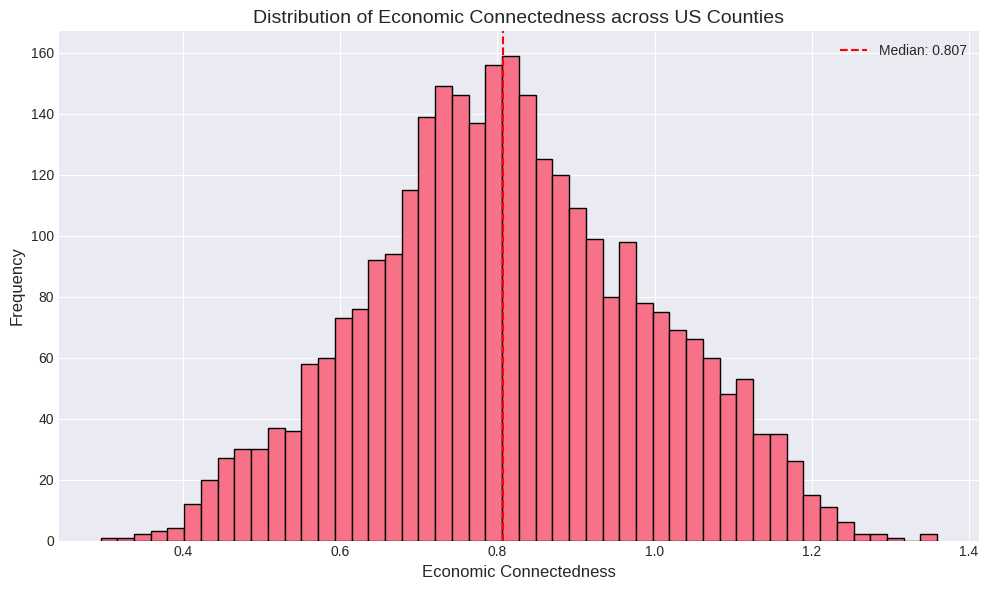


✅ Γράφημα αποθηκεύτηκε: figures/ec_distribution.png


In [ ]:
# Αν υπάρχει η στήλη ec_county, δες την κατανομή της
if 'ec_county' in county_df.columns:
    print("📊 Κατανομή Economic Connectedness:")
    print("=" * 60)
    print(county_df['ec_county'].describe())

    # Histogram
    fig, ax = plt.subplots(figsize=(10, 6))
    county_df['ec_county'].hist(bins=50, ax=ax, edgecolor='black')
    ax.set_xlabel('Economic Connectedness', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title('Distribution of Economic Connectedness across US Counties', fontsize=14)
    ax.axvline(county_df['ec_county'].median(), color='red', linestyle='--',
               label=f'Median: {county_df["ec_county"].median():.3f}')
    ax.legend()
    plt.tight_layout()
    plt.savefig('figures/ec_distribution.png', dpi=150, bbox_inches='tight')
    plt.show()

    print(f"\n✅ Γράφημα αποθηκεύτηκε: figures/ec_distribution.png")

### 5.3 Geographic Information

In [ ]:
# Αναζήτηση γεωγραφικών πληροφοριών
print("🗺️ Γεωγραφικές Στήλες:")
print("=" * 60)

geo_keywords = ['county', 'state', 'fips', 'zip', 'name']
geo_columns = [col for col in county_df.columns
               if any(keyword in col.lower() for keyword in geo_keywords)]

for col in geo_columns:
    print(f"  • {col}")

# Δείγμα γεωγραφικών δεδομένων
if geo_columns:
    print("\n📍 Δείγμα Γεωγραφικών Δεδομένων:")
    display(county_df[geo_columns].head(10))

🗺️ Γεωγραφικές Στήλες:
  • county
  • county_name
  • ec_county
  • ec_se_county
  • child_ec_county
  • child_ec_se_county
  • ec_grp_mem_county
  • ec_high_county
  • ec_high_se_county
  • child_high_ec_county
  • child_high_ec_se_county
  • ec_grp_mem_high_county
  • exposure_grp_mem_county
  • exposure_grp_mem_high_county
  • child_exposure_county
  • child_high_exposure_county
  • bias_grp_mem_county
  • bias_grp_mem_high_county
  • child_bias_county
  • child_high_bias_county
  • clustering_county
  • support_ratio_county
  • volunteering_rate_county
  • civic_organizations_county

📍 Δείγμα Γεωγραφικών Δεδομένων:


,county,county_name,ec_county,ec_se_county,child_ec_county,child_ec_se_county,ec_grp_mem_county,ec_high_county,ec_high_se_county,child_high_ec_county,...,child_exposure_county,child_high_exposure_county,bias_grp_mem_county,bias_grp_mem_high_county,child_bias_county,child_high_bias_county,clustering_county,support_ratio_county,volunteering_rate_county,civic_organizations_county
0,1001,"Autauga, Alabama",0.72077,0.00831,1.11754,0.02467,0.77223,1.21372,0.01019,1.29814,...,1.14816,1.19944,0.05526,-0.22748,0.02668,-0.08229,0.10347,0.98275,0.04355,0.01518
1,1003,"Baldwin, Alabama",0.74313,0.00661,0.83064,0.01629,0.76215,1.28302,0.00757,1.06080,...,0.84588,1.00797,0.02950,-0.21519,0.01802,-0.05241,0.09624,0.98684,0.06117,0.01526
2,1005,"Barbour, Alabama",0.41366,0.00978,0.58541,0.02707,0.35927,0.91897,0.02199,0.86154,...,0.63306,0.71967,0.13457,-0.34086,0.07528,-0.19714,0.14911,0.99911,0.02093,0.01474
3,1007,"Bibb, Alabama",0.63152,0.01175,0.72265,0.03027,0.68094,1.06378,0.01476,0.83973,...,0.71433,0.72395,0.04108,-0.27727,-0.01165,-0.15993,0.14252,0.99716,0.05294,0.01439
4,1009,"Blount, Alabama",0.72562,0.00985,0.76096,0.02466,0.79584,1.10569,0.01163,0.86316,...,0.74821,0.79375,0.00217,-0.24946,-0.01704,-0.08745,0.11243,0.99069,0.05704,0.01724
5,1011,"Bullock, Alabama",0.35515,0.01134,NaN,NaN,0.24803,0.95596,0.04994,NaN,...,NaN,NaN,0.07974,-0.19417,NaN,NaN,0.18581,1.00000,0.01713,0.00975
6,1013,"Butler, Alabama",0.46026,0.01039,0.63507,0.03159,0.43619,0.93106,0.01989,0.79861,...,0.59068,0.71077,0.09278,-0.31730,-0.07516,-0.12359,0.16094,1.00000,0.03807,0.01286
7,1015,"Calhoun, Alabama",0.60189,0.00711,0.80398,0.01891,0.63921,1.04627,0.00973,0.98472,...,0.79993,0.89271,0.05719,-0.23771,-0.00507,-0.10307,0.11236,0.99701,0.05313,0.01739
8,1017,"Chambers, Alabama",0.49761,0.00869,0.62215,0.02561,0.54166,0.91306,0.01359,0.76905,...,0.60910,0.68218,0.11264,-0.23977,-0.02143,-0.12734,0.13574,0.99759,0.02566,0.01098
9,1019,"Cherokee, Alabama",0.60461,0.01188,0.61975,0.03417,0.67164,0.94985,0.01522,0.71522,...,0.60974,0.65038,0.02300,-0.25110,-0.01641,-0.09970,0.12273,0.99697,0.04666,0.01796


In [ ]:
# Πόσα unique counties έχουμε;
if 'county' in county_df.columns or 'county_name' in county_df.columns:
    county_col = 'county' if 'county' in county_df.columns else 'county_name'
    n_counties = county_df[county_col].nunique()
    print(f"🏛️ Σύνολο Counties: {n_counties:,}")

if 'state' in county_df.columns or 'state_name' in county_df.columns:
    state_col = 'state' if 'state' in county_df.columns else 'state_name'
    n_states = county_df[state_col].nunique()
    print(f"🏴 Σύνολο States: {n_states}")

🏛️ Σύνολο Counties: 3,089


### 5.4 ZIP Code Data (για Question 3)

In [ ]:
# Φόρτωση ZIP code data
try:
    zip_df = pd.read_csv(f'{data_path}social_capital_zip.csv')
    print("✅ ZIP code data loaded successfully!\n")

    print(f"📊 Διαστάσεις: {zip_df.shape[0]:,} rows × {zip_df.shape[1]} columns\n")

    print("📋 Πρώτες 5 γραμμές:")
    display(zip_df.head())

    # Columns
    print("\n📑 Στήλες:")
    for i, col in enumerate(zip_df.columns, 1):
        print(f"{i:2d}. {col}")

except FileNotFoundError:
    print("❌ Το αρχείο 'social_capital_zip.csv' δεν βρέθηκε!")

✅ ZIP code data loaded successfully!

📊 Διαστάσεις: 23,028 rows × 23 columns

📋 Πρώτες 5 γραμμές:


,zip,county,num_below_p50,pop2018,ec_zip,ec_se_zip,nbhd_ec_zip,ec_grp_mem_zip,ec_high_zip,ec_high_se_zip,...,exposure_grp_mem_high_zip,nbhd_exposure_zip,bias_grp_mem_zip,bias_grp_mem_high_zip,nbhd_bias_zip,nbhd_bias_high_zip,clustering_zip,support_ratio_zip,volunteering_rate_zip,civic_organizations_zip
0,1001,25013.0,995.787468,17621,0.88157,0.02422,1.51095,1.10210,1.47136,0.01599,...,1.45669,1.50590,0.02434,-0.10001,-0.00336,-0.21186,0.10572,0.94526,0.05650,0.01080
1,1002,25015.0,1312.117077,30066,1.18348,0.02227,0.97760,1.23333,1.62290,0.01500,...,1.53277,1.20282,0.09856,-0.06421,0.18724,-0.24353,0.10340,0.90163,0.14951,0.03688
2,1003,25015.0,NaN,11238,1.37536,0.05046,NaN,1.44359,1.65159,0.02898,...,1.57757,NaN,0.02482,-0.05143,NaN,NaN,0.13650,0.76924,0.10501,0.08050
3,1005,25027.0,381.519745,4991,1.15543,0.03050,1.46491,1.30756,1.47733,0.01664,...,1.43769,1.46397,0.00850,-0.07246,-0.00064,-0.11397,0.10554,0.95837,0.15862,0.02163
4,1007,25015.0,915.396667,14967,1.19240,0.02046,1.17985,1.32294,1.56812,0.01364,...,1.43019,1.23109,-0.01188,-0.11464,0.04162,-0.21283,0.10391,0.94873,0.13053,0.01690



📑 Στήλες:
 1. zip
 2. county
 3. num_below_p50
 4. pop2018
 5. ec_zip
 6. ec_se_zip
 7. nbhd_ec_zip
 8. ec_grp_mem_zip
 9. ec_high_zip
10. ec_high_se_zip
11. nbhd_ec_high_zip
12. ec_grp_mem_high_zip
13. exposure_grp_mem_zip
14. exposure_grp_mem_high_zip
15. nbhd_exposure_zip
16. bias_grp_mem_zip
17. bias_grp_mem_high_zip
18. nbhd_bias_zip
19. nbhd_bias_high_zip
20. clustering_zip
21. support_ratio_zip
22. volunteering_rate_zip
23. civic_organizations_zip


### 5.5 High School Data (για Question 4)

In [ ]:
# Φόρτωση high school data
try:
    hs_df = pd.read_csv(f'{data_path}social_capital_high_school.csv')
    print("✅ High school data loaded successfully!\n")

    print(f"📊 Διαστάσεις: {hs_df.shape[0]:,} rows × {hs_df.shape[1]} columns\n")

    print("📋 Πρώτες 5 γραμμές:")
    display(hs_df.head())

    # Αναζήτηση για friending bias columns
    print("\n🔎 Στήλες με 'bias':")
    bias_cols = [col for col in hs_df.columns if 'bias' in col.lower()]
    for col in bias_cols:
        print(f"  • {col}")

    print("\n🔎 Στήλες με 'exposure':")
    exposure_cols = [col for col in hs_df.columns if 'exposure' in col.lower()]
    for col in exposure_cols:
        print(f"  • {col}")

except FileNotFoundError:
    print("❌ Το αρχείο 'social_capital_high_school.csv' δεν βρέθηκε!")

✅ High school data loaded successfully!

📊 Διαστάσεις: 17,525 rows × 21 columns

📋 Πρώτες 5 γραμμές:


,high_school,high_school_name,zip,county,students_9_to_12,ec_own_ses_hs,ec_own_ses_se_hs,ec_parent_ses_hs,ec_parent_ses_se_hs,ec_high_own_ses_hs,...,ec_high_parent_ses_hs,ec_high_parent_ses_se_hs,exposure_own_ses_hs,exposure_parent_ses_hs,bias_own_ses_hs,bias_parent_ses_hs,bias_high_own_ses_hs,bias_high_parent_ses_hs,clustering_hs,volunteering_rate_hs
0,00000044,Holy Spirit Catholic School,35405,1125,158,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.693142,0.086807
1,00000226,John Carroll Catholic HS,35209,1073,538,1.52901,0.04220,1.43847,0.05073,1.64439,...,1.46086,0.04742,1.50707,1.44259,-0.01456,0.00285,-0.09112,-0.01266,0.604580,0.069540
2,00000237,Holy Family Cristo Rey Catholic HS,35218,1073,229,0.66359,0.07105,NaN,NaN,0.87627,...,NaN,NaN,0.65517,NaN,-0.01286,NaN,-0.33747,NaN,0.686860,0.051010
3,00000714,Montgomery Catholic Preparatory School,36116,1101,363,1.56551,0.05799,NaN,NaN,1.60898,...,NaN,NaN,1.49000,NaN,-0.05068,NaN,-0.07985,NaN,0.673730,0.042280
4,00000758,St Paul's Episcopal School,36608,1097,409,1.62628,0.04533,1.57592,0.05254,1.72722,...,1.60072,0.04730,1.62275,1.57514,-0.00217,-0.00050,-0.06438,-0.01624,0.623290,0.060610



🔎 Στήλες με 'bias':
  • bias_own_ses_hs
  • bias_parent_ses_hs
  • bias_high_own_ses_hs
  • bias_high_parent_ses_hs

🔎 Στήλες με 'exposure':
  • exposure_own_ses_hs
  • exposure_parent_ses_hs


### 5.6 College Data (για Question 5)

In [ ]:
# Φόρτωση college data
try:
    college_df = pd.read_csv(f'{data_path}social_capital_college.csv')
    print("✅ College data loaded successfully!\n")

    print(f"📊 Διαστάσεις: {college_df.shape[0]:,} rows × {college_df.shape[1]} columns\n")

    print("📋 Πρώτες 5 γραμμές:")
    display(college_df.head())

    # Αναζήτηση για racial diversity columns
    print("\n🔎 Στήλες με 'share' (φυλετική σύνθεση):")
    share_cols = [col for col in college_df.columns if 'share' in col.lower()]
    for col in share_cols:
        print(f"  • {col}")

except FileNotFoundError:
    print("❌ Το αρχείο 'social_capital_college.csv' δεν βρέθηκε!")

✅ College data loaded successfully!

📊 Διαστάσεις: 2,586 rows × 22 columns

📋 Πρώτες 5 γραμμές:


,college,college_name,zip,county,mean_students_per_cohort,ec_own_ses_college,ec_own_ses_se_college,ec_parent_ses_college,ec_parent_ses_se_college,ec_high_own_ses_college,...,ec_high_parent_ses_se_college,exposure_own_ses_college,exposure_parent_ses_college,bias_own_ses_college,bias_parent_ses_college,bias_high_own_ses_college,bias_high_parent_ses_college,clustering_college,support_ratio_college,volunteering_rate_college
0,100200,Alabama A & M University,35762,1089,943.666667,0.85678,0.02233,0.67629,0.03241,1.12202,...,0.03498,0.84662,0.65090,-0.01200,-0.03900,-0.32529,-0.14036,0.24470,0.99483,0.03256
1,100300,Faulkner University,36109,1101,227.666667,1.30964,0.04869,1.26671,0.05812,1.54639,...,0.05134,1.23776,1.20183,-0.05807,-0.05398,-0.24935,-0.12001,0.40754,0.99481,0.03336
2,100400,University of Montevallo,35115,1117,494.000000,1.42378,0.03040,1.15413,0.03638,1.57365,...,0.03395,1.41664,1.17101,-0.00504,0.01442,-0.11083,-0.05979,0.30921,0.99683,0.09566
3,100500,Alabama State University,36104,1101,NaN,0.77916,0.01937,0.67090,0.03038,1.04811,...,0.03201,0.75162,0.65297,-0.03664,-0.02747,-0.39448,-0.12802,0.23222,0.99485,0.02150
4,100700,Central Alabama Community College,35010,1123,NaN,0.72742,0.03504,0.77238,0.04497,0.98888,...,0.04984,0.76579,0.76786,0.05010,-0.00589,-0.29133,-0.13139,0.34104,0.99271,0.02922



🔎 Στήλες με 'share' (φυλετική σύνθεση):


## 6. Summary & Next Steps

### ✅ Checklist - Τι έχουμε κάνει:

- [x] Εγκατάσταση βιβλιοθηκών
- [x] Δημιουργία δομής φακέλων
- [x] Download και φόρτωση datasets
- [x] Exploratory Data Analysis (EDA)
- [x] Κατανόηση δομής δεδομένων
- [x] Εντοπισμός κλειδικών μεταβλητών

### 📊 Τι ανακαλύψαμε:

1. **County Data**: [Συμπλήρωσε με τα findings σου]
2. **ZIP Data**: [Συμπλήρωσε με τα findings σου]
3. **High School Data**: [Συμπλήρωσε με τα findings σου]
4. **College Data**: [Συμπλήρωσε με τα findings σου]

### 🎯 Next Steps:

Στο επόμενο notebook (Step 2) θα:
1. Δημιουργήσουμε τον διαδραστικό χάρτη (Question 1)
2. Καθαρίσουμε και προετοιμάσουμε τα δεδομένα για visualizations
3. Ξεκινήσουμε με το Plotly choropleth map

---

**💾 Μην ξεχάσεις να σώσεις αυτό το notebook!**

## 7. Save Processed Data (Optional)

Αν θέλεις να αποθηκεύσεις κάποια processed versions των datasets:

In [ ]:
# Παράδειγμα: Αποθήκευση cleaned county data
# county_df_clean = county_df.dropna(subset=['ec_county'])  # Αφαίρεση NA
# county_df_clean.to_csv('data/processed/county_cleaned.csv', index=False)
# print("✅ Processed data saved!")